In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
#local_zip = 'datasets/messy_vs_clean_room.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('datasets')
#zip_ref.close()
 
base_dir = 'datasets/images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('datasets/images/train')

['clean', 'messy']

In [5]:
os.listdir('datasets/images/val')

['clean', 'messy']

In [6]:
train_clean_dir = os.path.join(train_dir, 'clean')
 
train_messy_dir = os.path.join(train_dir, 'messy')
 
validation_clean_dir = os.path.join(val_dir, 'clean')
 
validation_messy_dir = os.path.join(val_dir, 'messy')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,horizontal_flip=True,
                                   shear_range = 0.2,fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,horizontal_flip=True,
                                  shear_range = 0.2,fill_mode = 'nearest')

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),# resolution(150x150) px
                                                    batch_size=4,class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150),
                                                        batch_size=4,class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # total batch every epoch
      epochs=20, 
      validation_data=validation_generator, # data validation accuracy
      validation_steps=5,  # total batch every epoch
      verbose=2)

Epoch 1/20
Epoch 1/20
25/25 - 4s - loss: 0.7494 - acc: 0.5000 - val_loss: 0.6885 - val_acc: 0.5000
Epoch 2/20
Epoch 1/20
25/25 - 2s - loss: 0.6975 - acc: 0.4500 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 3/20
Epoch 1/20
25/25 - 1s - loss: 0.6910 - acc: 0.5100 - val_loss: 0.6729 - val_acc: 0.5000
Epoch 4/20
Epoch 1/20
25/25 - 1s - loss: 0.6894 - acc: 0.5000 - val_loss: 0.6814 - val_acc: 0.7500
Epoch 5/20
Epoch 1/20
25/25 - 1s - loss: 0.6531 - acc: 0.6500 - val_loss: 0.6072 - val_acc: 0.6500
Epoch 6/20
Epoch 1/20
25/25 - 1s - loss: 0.6142 - acc: 0.7100 - val_loss: 0.5909 - val_acc: 0.7000
Epoch 7/20
Epoch 1/20
25/25 - 1s - loss: 0.5793 - acc: 0.7400 - val_loss: 0.4440 - val_acc: 0.8500
Epoch 8/20
Epoch 1/20
25/25 - 1s - loss: 0.6454 - acc: 0.6600 - val_loss: 0.5653 - val_acc: 0.6500
Epoch 9/20
Epoch 1/20
25/25 - 1s - loss: 0.6349 - acc: 0.6400 - val_loss: 0.5769 - val_acc: 0.6000
Epoch 10/20
Epoch 1/20
25/25 - 1s - loss: 0.5717 - acc: 0.7000 - val_loss: 0.4560 - val_acc: 0.8000
Epoch 11/

In [12]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


Clean room


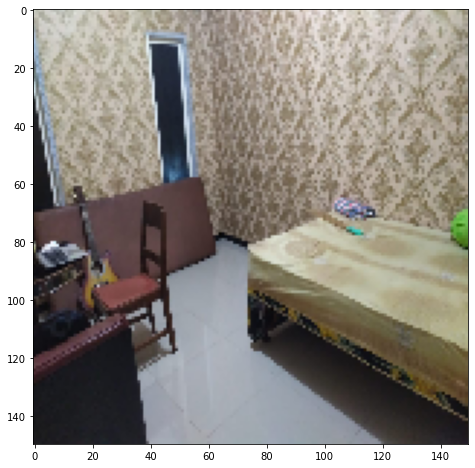

In [13]:
path='datasets/test.jpeg'

img = image.load_img(path, target_size=(150,150))
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
if classes==0:
    print('Clean room')
else:
    print('Messy room')